# Kachra Rani 
## Team:
### 1. Syed Hassan Haider
### 2. Inara Naseem G H Chagani 
### 3. Muhammad Shahrom Ali 

In [78]:
# Input: Image 
# Output : Label for that Image 

# Steps: 
# 1. Loading Image and Preprocessing 
# 2. Defining Model Architecture 
# 3. Training the Model 
# 4. Estimation of performance

In [1]:
# Imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')

In [2]:
# Supporting information defined 

dataset_info = {
    # FORMAT::garbage_type : (no_of_imgs, label_value)
    'glass' : (501, 0),
    'plastic' : (482, 1),
    'cardboard' : (403, 2),
    'paper' : (594, 3),
    'metal' : (410, 4),
    'trash' : (137, 5)
}

#Label_value (int) : garbage_type (string)
labels = {dataset_info[i][1] : i for i in dataset_info}

In [7]:
#Load data 
KR_dataset = list()

scale_percent = 50 # percent of original size


for garbage_type in dataset_info:
    
    img_count = dataset_info[garbage_type][0]
    garbage_label = dataset_info[garbage_type][1]
    
    for i in range(1,  img_count + 1):
        img_path = './Dataset/' + garbage_type + "/" + garbage_type + str(i) + '.jpg'
        
        img = mpimg.imread(img_path)
        
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height) 
        
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
         
        KR_dataset.append((img, garbage_label))
        
KR_dataset = np.array(KR_dataset, dtype=object)
#DATASET LOADED

In [8]:
##Break into train and test dataset - 70:30 split

train_ratio = 0.7 #Only change this 
test_ratio = 1 - train_ratio

train_size = int(KR_dataset.shape[0] * train_ratio) + 1

#Shuffle the dataset 
for i in range(3):
    np.random.shuffle(KR_dataset)

x_train = [KR_dataset[i][0] for i in range(0, train_size)]
y_train = [(KR_dataset[i][1],) for i in range(0, train_size)]

x_test = [KR_dataset[i][0] for i in range(train_size, KR_dataset.shape[0])]
y_test = [(KR_dataset[i][1],) for i in range(train_size, KR_dataset.shape[0])]

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [5]:
del KR_dataset

x_train shape: (1769, 192, 256, 3)
y_train shape: (1769, 1)
Garbage Type at index 0 : metal
x_test shape: (758, 192, 256, 3)
x_test shape: (758, 1)
Garbage Type at index 1769 : cardboard


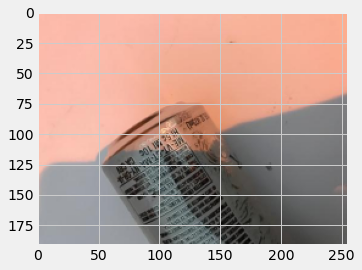

In [9]:
ind = 0

print("x_train shape:", x_train.shape)
plt.imshow(x_train[ind])

print("y_train shape:", y_train.shape)
print("Garbage Type at index", ind, ": " + labels[y_train[ind][0]])

print("x_test shape:", x_test.shape)
# plt.imshow(x_test[ind])

print("x_test shape:", y_test.shape)
print("Garbage Type at index", x_train.shape[0] + ind, ": " + labels[y_test[ind][0]])

the image label is plastic


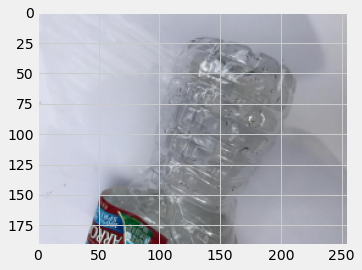

In [10]:
index = 451
# x_train[index]
plt.imshow(x_train[index])
print("the image label is", labels[y_train[index][0]])

In [11]:
#convert the labels into a set of numbers to input into the neural network
y_train_one_hot = keras.utils.to_categorical(y_train)
y_test_one_hot = keras.utils.to_categorical(y_test)

In [14]:
# print(y_train_one_hot)
# print("number of collumns in one hot encoding:", len(y_train_one_hot[0]))

print("the one hot image label is", y_train_one_hot[index])

the one hot image label is [0. 1. 0. 0. 0. 0.]


In [15]:
#Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255 

In [16]:
x_train[index]

array([[[0.8745098 , 0.88235294, 0.93333333],
        [0.8627451 , 0.87058824, 0.92156863],
        [0.84705882, 0.85490196, 0.90588235],
        ...,
        [0.74901961, 0.74509804, 0.76862745],
        [0.74509804, 0.74117647, 0.76470588],
        [0.74117647, 0.7372549 , 0.76078431]],

       [[0.87058824, 0.87843137, 0.92941176],
        [0.8627451 , 0.87058824, 0.92156863],
        [0.84705882, 0.85490196, 0.90588235],
        ...,
        [0.74901961, 0.74509804, 0.76862745],
        [0.74509804, 0.74117647, 0.76470588],
        [0.74117647, 0.7372549 , 0.76078431]],

       [[0.87058824, 0.87843137, 0.92941176],
        [0.85882353, 0.86666667, 0.91764706],
        [0.84313725, 0.85098039, 0.90196078],
        ...,
        [0.74901961, 0.74509804, 0.76862745],
        [0.74509804, 0.74117647, 0.76470588],
        [0.74117647, 0.7372549 , 0.76078431]],

       ...,

       [[0.85098039, 0.85882353, 0.91764706],
        [0.84705882, 0.85490196, 0.91372549],
        [0.84313725, 0

In [23]:
#Models  architecture

model = Sequential()

#add the first layer 
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(192, 256, 3)))

#add a pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#add another convolution layer 
model.add(Conv2D(32, (5, 5), activation='relu'))

#add another pooling layer 
model.add(MaxPooling2D(pool_size=(2,2)))

#add a flattening layer 
model.add(Flatten())

#Add a layer with 1000 neurons 
model.add(Dense(500, activation='relu'))

#add a drop out layer - reduce to 50% size  
model.add(Dropout(0.5))

#Add another layer with 50% of original neurons 
model.add(Dense(250, activation='relu'))

#add another drop out layer 
model.add(Dropout(0.5))

#Add another layer with 50% of original neurons 
model.add(Dense(125, activation='relu'))

#Add another layer, with 6 neurons 
model.add(Dense(6, activation='softmax'))

In [24]:
#Compile the model
model.compile(loss = 'categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [25]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, 
                batch_size = 256, 
                epochs = 10, 
                validation_split = 0.2)

Epoch 1/10
6/6 [==============================] - 120s 15s/step - loss: 2.2069 - accuracy: 0.1789 - val_loss: 1.7251 - val_accuracy: 0.2316
Epoch 2/10
6/6 [==============================] - 89s 15s/step - loss: 1.7426 - accuracy: 0.2504 - val_loss: 1.7166 - val_accuracy: 0.2062
Epoch 3/10
6/6 [==============================] - 86s 14s/step - loss: 1.7058 - accuracy: 0.2331 - val_loss: 1.6238 - val_accuracy: 0.3023
Epoch 4/10
6/6 [==============================] - 82s 13s/step - loss: 1.6593 - accuracy: 0.2440 - val_loss: 1.6288 - val_accuracy: 0.2768
Epoch 5/10
6/6 [==============================] - 79s 13s/step - loss: 1.6254 - accuracy: 0.2970 - val_loss: 1.4992 - val_accuracy: 0.4011
Epoch 6/10
6/6 [==============================] - 83s 14s/step - loss: 1.5546 - accuracy: 0.3525 - val_loss: 1.4853 - val_accuracy: 0.3672
Epoch 7/10
6/6 [==============================] - 81s 13s/step - loss: 1.5086 - accuracy: 0.3735 - val_loss: 1.4300 - val_accuracy: 0.4068
Epoch 8/10
6/6 [==========